In [1]:
import numpy as np
import pandas as pd
import glob, os, sys

import matplotlib.pyplot as plt
%matplotlib inline

import h5py

from param import *

## 学習データセット作成

* 対象マウスは、不完全データなし＆20回積算計測　のID20-40に限定
* 判別に用いる深さは 100 umのみ
* 分類：右耳尖部⇔左耳尖部

In [2]:
foreach = {
    "mice" : range(24, 35)
}

withall = {
   "depth" : [50, 100, 150, 200, 250]
}

classify = {
    "position" : ["La", "Ra"]
}

In [3]:
hf_path = src_dir.replace("csv", "all.h5")
hf = h5py.File(hf_path,'r')
print(list(hf.keys()))
print(list(hf['mice00'].keys()))
print(list(hf['mice00']['La'].keys()))

L = len(hf['mice00']['La']['000'])
print(L)

train_data = {}
for pos in classify["position"] : train_data[pos] = []
for n_mice in foreach["mice"]:
    for pos in classify["position"]:
        dim = len(withall["depth"])
        dat = np.zeros((dim, L))
        for i, depth in enumerate(withall["depth"]):
            dat[i,:] = np.array( hf['mice{0:0>2}/{1}/{2:0>3}'.format(n_mice, pos, depth)] )
            #dat[i,:] /= np.sum(dat[i,:])
            dat[i,:] /= dat[i,-1]
        train_data[pos].append(dat)

for pos in classify["position"] :
    np.save( os.path.join(out_dir, pos), np.array(train_data[pos]))

hf.flush()
hf.close()

['mice00', 'mice01', 'mice02', 'mice03', 'mice04', 'mice05', 'mice06', 'mice07', 'mice08', 'mice09', 'mice10', 'mice11', 'mice12', 'mice13', 'mice14', 'mice15', 'mice16', 'mice17', 'mice18', 'mice19', 'mice20', 'mice21', 'mice22', 'mice23', 'mice24', 'mice25', 'mice26', 'mice27', 'mice28', 'mice29', 'mice30', 'mice31', 'mice32', 'mice33', 'mice34', 'mice35', 'mice36', 'mice37', 'mice38', 'mice39', 'mice40']
['La', 'Lb', 'Ra', 'Rb']
['000', '010', '050', '100', '150', '200', '250']
9399


## 可視化

右耳が陽性（炎症あり）⇔左耳が陰性（炎症なし）

11 5 9399


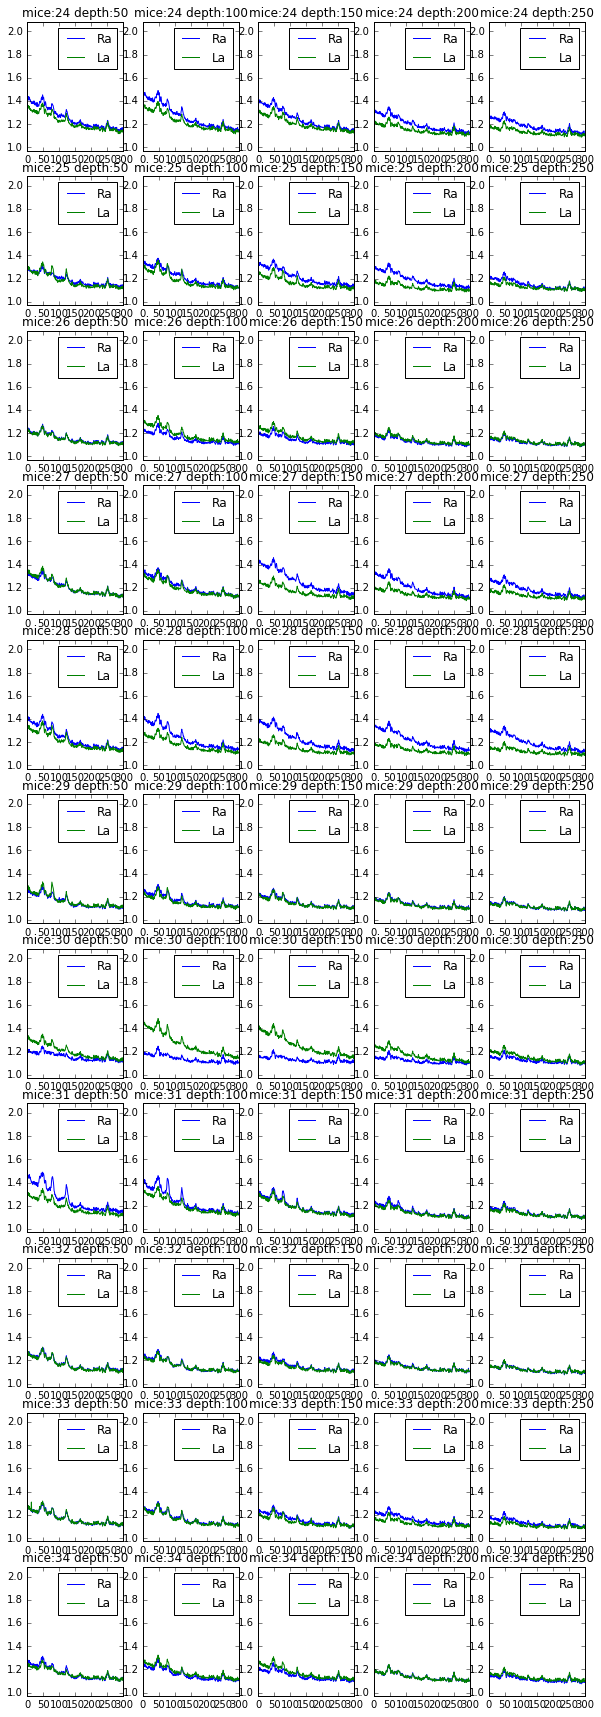

In [4]:
dat_positive = np.load(os.path.join(out_dir, "Ra.npy"))
dat_negative = np.load(os.path.join(out_dir, "La.npy"))
assert len(dat_positive) == len(dat_negative)
H,W,N = dat_positive.shape
print(H,W,N)

plt.figure(figsize=(10,30))

ymin = min(dat_positive.min(), dat_negative.min())
ymax = max(dat_positive.max(), dat_negative.max())

for i, (pos_, neg_) in enumerate(zip(dat_positive, dat_negative)):
    for j, (pos, neg) in enumerate(zip( pos_, neg_ )):    
        plt.subplot(H, W, i*W+j+1)
        plt.title("mice:{0} depth:{1}".format(foreach["mice"][i], withall["depth"][j]))
        plt.plot(pos[1500:4500:10], label='Ra')
        plt.plot(neg[1500:4500:10], label='La')
        plt.legend()
        plt.ylim([ymin, ymax])

In [13]:
from scipy.interpolate import griddata


In [11]:
N = len(pos)
pos_rs = griddata(np.arange(N),pos,np.arange(0,N,10),method='linear')
neg_rs = griddata(np.arange(N),neg,np.arange(0,N,10),method='linear')

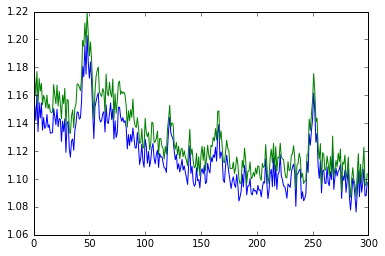

In [12]:
plt.plot(pos_rs[150:450])
plt.plot(neg_rs[150:450])

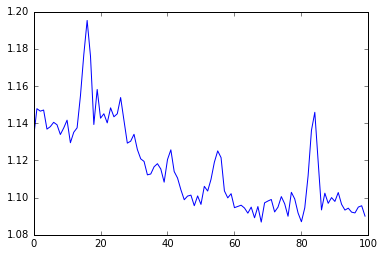

In [21]:
from scipy.ndimage.filters import gaussian_filter1d

pos_fil = gaussian_filter1d(pos, sigma=5)

plt.plot(pos_fil[1500:4500:30])

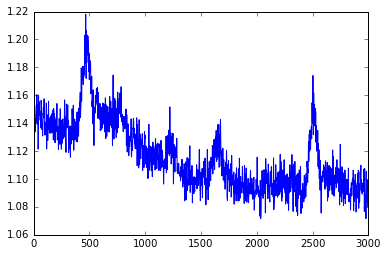

In [19]:

plt.plot(pos[1500:4500])

